# Introducción a `SymPy`

Esta introducción está basada en las [transparencias de SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf) de [J. Gross](http://www.jonathangross.de)

Véase también [Taming math and physics using SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf), basado en [No bullshit guide to Math and Physics](https://minireference.com)

Una forma fácil de usar `SymPy` en línea es en la página de [SymPy Live](http://live.sympy.org) o bien utilizando los servicios de [sage en la nube](https://cloud.sagemath.com)





# Vamos a aprender a guarrear celdas

## Primeros pasos

### Listas

1. Una cosa

3. Se me olvidó

1. Otra cosa

Otro lista 

- uno 

- dos


### Fórmulas

Una ecuación en línea $\begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}^2+1=0$, y centrada $$\int x^2+1 \mathrm d x$$ en $\mathbb R$ y un ideal $\mathfrak u$

Para que los gráficos se incrusten en este bloc necesitamos usar el siguiente comando

In [1]:
%matplotlib inline

Con las siguientes instrucciones importamos todas las variables y métodos de `SymPy`(en algunos casos sólo importaremos los métodos y variables que nos interesen)

También se puede ejecutar en línea con `isympy`

```python
~$ isympy 
IPython console for SymPy 0.7.6.1 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org

In [1]: 
```

A partir de `Python 3` la divisón se denota por `/` y la división entera por `//`; de ahí que se use 
```
from __future__ import division
``` 
para evitar confusiones si usamos `Python 2`

In [2]:
from sympy import *

In [32]:
init_printing(use_latex=true)

## Enteros, racionales, reales y complejos

División entera

In [33]:
1//7

División real

In [34]:
1/7

In [35]:
type(1/7)

float

In [36]:
r=S("1/7")
s=S("2/3")

In [37]:
r+s

In [38]:
type(_)

sympy.core.numbers.Rational

In [39]:
2**50

Si queremos trabajar con un racional $a/b$, podemos "sympificar" la expresión "a/b"

In [40]:
a=S("1/7")

In [41]:
a.evalf(20)

In [42]:
a==Rational(1,7)

True

In [43]:
float(a)

In [44]:
a.n()

In [45]:
1+2*I

In [46]:
(I)**4

In [47]:
pi.n(150)

### Símbolos

Si intentamos evaluar alguna expresión con `x` o `y` dará un error de nombre no definido; tenemos primero que declararlos como símbolos

Esto lo hacemos con `Symbol` para una variable, o `symbols` para varios

In [48]:
x,y =symbols("x, y")

In [49]:
p = (x+y)**10

In [50]:
p

In [51]:
expand(p)

In [52]:
factor(x**2-y**2)

In [53]:
_.args

In [54]:
simplify(x** 2+2*x+y-2*x)

In [55]:
simplify(cos(x)**2+sin(x)**2)

In [56]:
collect(x**2+2*x*y+2*x,x)

In [57]:
(ln(x)+y).subs({x:2,y:1})

In [58]:
_.n()

In [59]:
a,b,c,d = symbols("a b c d")

In [60]:
together(a/b+c/d)

In [61]:
apart((a**2+1)/a)

In [62]:
sin(x)==cos(x-pi/2)

True

In [63]:
expand(sin(2*x))

In [64]:
expand_trig(sin(2*x))

In [65]:
trigsimp(_)

## Resolución de ecuaciones

In [66]:
solve(x**2+2*x-1)

In [67]:
l=solve(a*x**2+b*x+c,x)

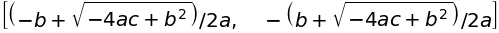

In [68]:
solve(a*x**2+b*x+c,x)

In [69]:
l[1].subs({a:1,b:2,c:-1})

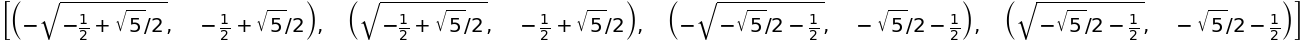

In [70]:
solve([x**2+y**2-1, y-x**2],[x,y])

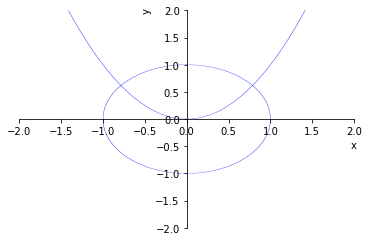

In [71]:
plot_implicit(Eq(x**2+y**2-1,0) | Eq(x**2-y,0),(x,-2,2),(y,-2,2))

## Límites

El infinito se denota por `oo` (dos oes en minúscula seguidos)

In [72]:
oo+1

In [73]:
n=Symbol("n", integer=true)

In [74]:
limit((1+1/n)**n, n, oo)

In [75]:
limit(1/x,x,0,dir="-")

In [76]:
limit(1/x,x,0,dir="+")

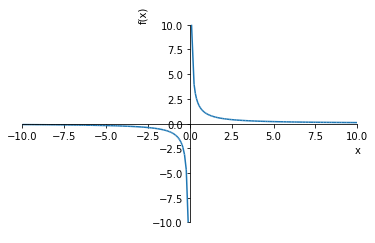

In [79]:
plot((1/x,(x,.1,10)),(1/x,(x,-10,-.1)))

In [80]:
a_n=1/n

In [81]:
limit(1+a_n,n,oo)

In [82]:
[a_n.subs({n:i}) for i in range(1,10)]

## Derivadas

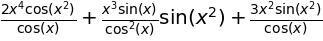

In [86]:
diff((x**3*sin(x**2))/cos(x))

In [87]:
diff((x**3*sin(x**2))/cos(x),y)

In [89]:
f=symbols("f", cls=Function)

In [90]:
dsolve(f(x)-diff(f(x),x),f(x))

## Integrales

In [91]:
integrate(cos(x))

In [92]:
integrate(cos(x),(x,-1,1))

## Series

In [93]:
a_n = 1/n

In [94]:
summation(a_n,(n,1,oo))

In [95]:
b_n=1/factorial(n)

In [96]:
summation(b_n,(n,0,oo))

In [97]:
exp = x**n/factorial(n)

In [98]:
summation(exp.subs({x:1}),(n,0,10))

In [99]:
_.n()

In [100]:
summation(exp.subs({x:5}),(n,0,oo))

Series de Taylor (en 0, MacLaurin)

In [101]:
series(sin(x),x,0,8)

O bien en el 1

In [102]:
series(sin(x+1),x,0,8)

## Matrices (y vectores)

Las matrices se introducen for filas como una lista de listas con el comando `Matrix`
Los vectores se consideran matrices con una sola fila

In [203]:
a=Matrix([[1,1,2],[1,-1,0]])

In [204]:
a

⎡1  1   2⎤
⎢        ⎥
⎣1  -1  0⎦

In [205]:
a=a[0:2,0:2]

In [206]:
a.det()

In [207]:
a.transpose()

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦

In [208]:
pretty_print(a)

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦


In [209]:
latex(a)

'\\left[\\begin{matrix}1 & 1\\\\1 & -1\\end{matrix}\\right]'

In [210]:
a[0,1]

In [211]:
a[0,0]

In [212]:
a.inv()

⎡1/2  1/2 ⎤
⎢         ⎥
⎣1/2  -1/2⎦

In [213]:
a.inv()*a

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [214]:
a.row(1)

[1  -1]

In [215]:
a.rref()

⎛⎡1  0⎤, [0, 1]⎞
⎜⎢    ⎥        ⎟
⎝⎣0  1⎦        ⎠

Valores propios, vectores propios y diagonalización

In [216]:
a.eigenvals()

In [217]:
a.eigenvects()

⎡⎛        ⎡⎡ -1   ⎤⎤⎞  ⎛       ⎡⎡  -1   ⎤⎤⎞⎤
⎢⎜-√2, 1, ⎢⎢──────⎥⎥⎟, ⎜√2, 1, ⎢⎢───────⎥⎥⎟⎥
⎢⎜        ⎢⎢1 + √2⎥⎥⎟  ⎜       ⎢⎢-√2 + 1⎥⎥⎟⎥
⎢⎜        ⎢⎢      ⎥⎥⎟  ⎜       ⎢⎢       ⎥⎥⎟⎥
⎣⎝        ⎣⎣  1   ⎦⎦⎠  ⎝       ⎣⎣   1   ⎦⎦⎠⎦

In [219]:
(a-sqrt(2)*eye(2)).nullspace()

⎡⎡  -1   ⎤⎤
⎢⎢───────⎥⎥
⎢⎢-√2 + 1⎥⎥
⎢⎢       ⎥⎥
⎣⎣   1   ⎦⎦

In [123]:
Q,D=a.diagonalize()

In [124]:
D

⎡-√2  0 ⎤
⎢       ⎥
⎣ 0   √2⎦

In [125]:
Q

⎡ -1       -1   ⎤
⎢──────  ───────⎥
⎢1 + √2  -√2 + 1⎥
⎢               ⎥
⎣  1        1   ⎦

In [129]:
(Q*D*Q.inv())

⎡   ⎛   1                1          ⎞                                         
⎢√2⋅⎜─────── - ─────────────────────⎟                                         
⎢   ⎜-√2 + 1            3           ⎟                                         
⎢   ⎝          (-√2 + 1) ⋅(2⋅√2 + 4)⎠             √2                       √2 
⎢──────────────────────────────────── + ─────────────────────   - ────────────
⎢               1 + √2                           2                (-√2 + 1)⋅(2
⎢                                       (-√2 + 1) ⋅(2⋅√2 + 4)                 
⎢                                                                             
⎢           √2               ⎛   1                1          ⎞                
⎢- ──────────────────── - √2⋅⎜─────── - ─────────────────────⎟            - ──
⎢  (-√2 + 1)⋅(2⋅√2 + 4)      ⎜-√2 + 1            3           ⎟                
⎣                            ⎝          (-√2 + 1) ⋅(2⋅√2 + 4)⎠              (-

                                         ⎤
        

In [130]:
simplify(_)

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦

In [131]:
b=Matrix([[1,3],[0,1]])

In [132]:
b.diagonalize()

MatrixError: Matrix is not diagonalizable

In [133]:
b.eigenvects()

⎡⎛1, 2, ⎡⎡1⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠⎦

In [134]:
b.jordan_form()

⎛⎡3  0⎤, ⎡1  1⎤⎞
⎜⎢    ⎥  ⎢    ⎥⎟
⎝⎣0  1⎦  ⎣0  1⎦⎠

La matriz indentidad tiene un función propia

In [135]:
eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Vamos a discutir el siguiente sistema en función del parámetro $a$. 

$$ \begin{array}{c} x+y+z=a,\\  2x+ay+z=-2,\\  -2x-2y+az=4.  \end{array} $$

In [187]:
x,y,z,a=symbols("x y z a")
C=Matrix([[1,1,1],[2,a,1],[-2,-2,a]])
b=Matrix([a,-2,4])

In [188]:
sol=solve(C.det())

In [189]:
sol

In [194]:
Ca=C.col_insert(-1,b)

In [198]:
C.subs({a:2}).rank()

In [199]:
Ca.subs({a:2}).rank()

In [190]:
linsolve((C.subs({a:2}),b.subs({a:2})),[x,y,z])

In [200]:
C.subs({a:-2}).rank()

In [201]:
Ca.subs({a:-2}).rank()

In [192]:
linsolve((C.subs({a:-2}),b.subs({a:-2})),[x,y,z])

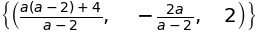

In [191]:
linsolve((C,b),[x,y,z])